In [1]:
import pandas as pd
import numpy as np 
import sklearn

from sklearn.metrics import mean_squared_error

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.utils.vis_utils import plot_model
from tensorflow import keras


from tensorflow.keras.layers import Input, Dense, BatchNormalization
import matplotlib.pyplot as plt
import matplotlib as mpl

In [17]:
def NormalizeData(data): #Must use this function to normalize the data before training
    normalized_data = (data - np.min(data,axis=0)) / (np.max(data,axis=0) - np.min(data,axis=0))
    return normalized_data

def Undo_NormalizeData(data_output, data): #Must use this function to get the predicted output
    not_normalized_data = data_output * (np.max(data,axis=0) - np.min(data,axis=0)) + np.min(data,axis=0)
    return not_normalized_data

df = pd.read_csv('training_data.csv') #TODO
#df = df.loc[()] #if necessary, conditionally select relevant data
print(df)
print(df.shape)

              x         y         z        vx        vy        vz  gamma_srp  \
0      8.644383  3.414014  6.272693  0.095590  0.084386  0.099086   0.005508   
1      1.041932  4.528473  5.164467  0.027336  0.022092  0.065584   0.000946   
2      2.249184  3.168478  3.653426  0.012158  0.018015  0.038449   0.029851   
3      9.355995  2.231757  8.930586  0.085698  0.083401  0.028777   0.051875   
4      8.874650  0.649924  4.857421  0.086009  0.020477  0.011519   0.033073   
...         ...       ...       ...       ...       ...       ...        ...   
49995  2.306939  7.350681  9.852080  0.016352  0.096401  0.083230   0.008722   
49996  9.965313  3.590980  8.771898  0.009535  0.099012  0.087118   0.043257   
49997  6.625152  7.674617  6.683209  0.008698  0.000204  0.091725   0.060322   
49998  1.519166  5.761292  6.354035  0.071963  0.014639  0.002344   0.017338   
49999  7.454597  2.299643  4.621034  0.049021  0.014605  0.036766   0.028852   

        gamma_D       psi        ref_x 

In [3]:
targets = ['residual_x','residual_y','residual_z']#,'dparam_dt1','dparam_dt2','dparam_dt3'] #TODO outputs 
predictors = ['x','y','z','vx','vy','vz','gamma_srp','gamma_D','psi','ref_x','ref_y','ref_z','ref_vx','ref_vy','ref_vz']#,'t'] #TODO inputs

X_data = df[predictors].values
Y_data = df[targets].values
X_data_normalized = NormalizeData(X_data)
Y_data_normalized = NormalizeData(Y_data)

In [4]:
#construct neural network architecture
keras.backend.clear_session()
model = Sequential()
model.add(Dense(1500, input_dim=len(predictors), activation= "relu"))
model.add(Dense(800, activation= "relu"))
model.add(Dense(300, activation= "relu"))
model.add(Dense(100, activation = "relu"))
model.add(Dense(30, activation = "relu"))
model.add(Dense(len(targets)))
# model.add(Dense(200, input_dim=len(predictors), activation= "relu"))
# model.add(Dense(80, activation = "relu"))
# model.add(Dense(40, activation = "relu"))
# model.add(Dense(len(targets)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1500)              24000     
                                                                 
 dense_1 (Dense)             (None, 800)               1200800   
                                                                 
 dense_2 (Dense)             (None, 300)               240300    
                                                                 
 dense_3 (Dense)             (None, 100)               30100     
                                                                 
 dense_4 (Dense)             (None, 30)                3030      
                                                                 
 dense_5 (Dense)             (None, 3)                 93        
                                                                 
Total params: 1,498,323
Trainable params: 1,498,323
Non-

In [5]:
optimizer_hyper = keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-10)
model.compile(loss = "mean_squared_error", optimizer = optimizer_hyper, metrics=['accuracy'])
test_amount = 0.20 #amount of test data, example: 0.1 = 10% of the (bottom portion of datapoints) datapoints will serve as test set
history = model.fit(X_data_normalized, Y_data_normalized, validation_split=test_amount, epochs=40, batch_size=4,shuffle=True)
print('finished training, ready to predict. If necessary, ready to validate.')

Epoch 1/40
10000/10000 [==============================] - 53s 5ms/step - loss: 0.0498 - accuracy: 0.3334 - val_loss: 0.0491 - val_accuracy: 0.3302
Epoch 2/40
10000/10000 [==============================] - 54s 5ms/step - loss: 0.0492 - accuracy: 0.3338 - val_loss: 0.0491 - val_accuracy: 0.3302
Epoch 3/40
10000/10000 [==============================] - 54s 5ms/step - loss: 0.0491 - accuracy: 0.3328 - val_loss: 0.0490 - val_accuracy: 0.3369
Epoch 4/40
10000/10000 [==============================] - 54s 5ms/step - loss: 0.0491 - accuracy: 0.3371 - val_loss: 0.0488 - val_accuracy: 0.3329
Epoch 5/40
10000/10000 [==============================] - 54s 5ms/step - loss: 0.0491 - accuracy: 0.3356 - val_loss: 0.0492 - val_accuracy: 0.3302
Epoch 6/40
10000/10000 [==============================] - 54s 5ms/step - loss: 0.0491 - accuracy: 0.3338 - val_loss: 0.0488 - val_accuracy: 0.3369
Epoch 7/40
10000/10000 [==============================] - 55s 5ms/step - loss: 0.0490 - accuracy: 0.3360 - val_loss: 0

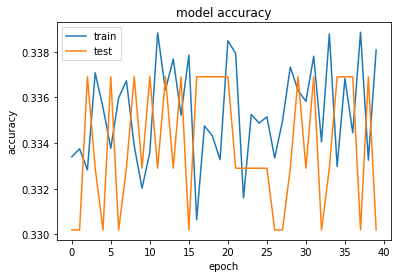

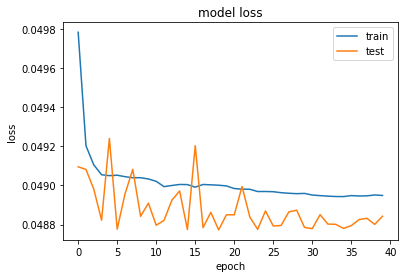

In [6]:
#do validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
mpl.rcParams['figure.dpi'] = 105

In [7]:
model.save('NN_model') #this is how to save the trained model to a folder
#model = keras.models.load_model('NN_model') #this is how to load the model folder as an object; model.predict(some_data)


INFO:tensorflow:Assets written to: NN_model\assets


In [18]:
#example of how to use the NN_model to predict on a given input
#probably nest the 5 lines below into a for loop to perform online predictions
model = keras.models.load_model('NN_model_3output')
reshaped_X = X_data_normalized[7,:].reshape(1,len(predictors)) #change the 0th index of X_train to see different datapoints
reshaped_X = X_data_normalized[4987,:].reshape(1,len(predictors)) #change the 0th index of X_train to see different datapoints
Y_output_normalized = model.predict(reshaped_X)[0]
Y_output_final = Undo_NormalizeData(Y_output_normalized, Y_data[4987])
print(Y_output_final)

[9.1757147e-07 9.0789956e-07 9.2843032e-07]


In [9]:
print(Y_data[4987])

[1.31e-06 1.52e-06 3.18e-07]


In [14]:
min_max_d = {'x':[np.min(df['x']),np.max(df['x'])], 'y'}
print(min_max_d)
print(min_max_d['x'][0])
print(min_max_d['x'][1])

{'x': [1.77e-05, 9.999828929]}
1.77e-05
9.999828929
